# Computational Linear Algebra: PCA Homework

## Initialization:
Fill the missing values in this text box and in the following code-cell.

**Academic Year:** 2024/2025

### Team Members (Alphabetical Order):
1. Koci, Geard (328626);
2. Omento, Davide (330764).

In [1]:
StudentID1 = 328626  # <-------- Fill in the missing value
StudentID2 = 330764  # <-------- Fill in the missing value

## Starting Code-Cell 
### Attention: DO NOT CHANGE THE CODE INSIDE THE FOLLOWING CELL!

In [2]:
####################################################################
############## DO NOT CHANGE THE CODE IN THIS CELL #################
####################################################################
import numpy as np

var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

label_types = ['Demographic']

variables_by_type = {
    'Demographics': ['Age', 'Height', 'Weight', 'Number of siblings', 
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type'],
    'Finance': ['Finances', 'Shopping centres', 'Branded clothing', 
                'Entertainment spending', 'Spending on looks', 
                'Spending on gadgets', 'Spending on healthy eating'],
    'Health': ['Smoking', 'Alcohol', 'Healthy eating'],
    'Interests': ['History', 'Psychology', 'Politics', 'Mathematics', 
                  'Physics', 'Internet', 'PC', 'Economy Management', 
                  'Biology', 'Chemistry', 'Reading', 'Geography', 
                  'Foreign languages', 'Medicine', 'Law', 'Cars', 
                  'Art exhibitions', 'Religion', 'Countryside, outdoors', 
                  'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 
                  'Active sport', 'Gardening', 'Celebrities', 'Shopping', 
                  'Science and technology', 'Theatre', 'Fun with friends', 
                  'Adrenaline sports', 'Pets'],
    'Movies': ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 
               'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 
               'Documentary', 'Western', 'Action'],
    'Music': ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 
              'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 
              'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 
              'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 
              'Techno, Trance', 'Opera'],
    'Personality': ['Daily events', 'Prioritising workload', 
                    'Writing notes', 'Workaholism', 'Thinking ahead', 
                    'Final judgement', 'Reliability', 'Keeping promises', 
                    'Loss of interest', 'Friends versus money', 'Funniness', 
                    'Fake', 'Criminal damage', 'Decision making', 'Elections', 
                    'Self-criticism', 'Judgment calls', 'Hypochondria', 
                    'Empathy', 'Eating to survive', 'Giving', 
                    'Compassion to animals', 'Borrowed stuff', 
                    'Loneliness', 'Cheating in school', 'Health', 
                    'Changing the past', 'God', 'Dreams', 'Charity', 
                    'Number of friends', 'Punctuality', 'Lying', 'Waiting', 
                    'New environment', 'Mood swings', 'Appearence and gestures', 
                    'Socializing', 'Achievements', 'Responding to a serious letter', 
                    'Children', 'Assertiveness', 'Getting angry', 
                    'Knowing the right people', 'Public speaking', 
                    'Unpopularity', 'Life struggles', 'Happiness in life', 
                    'Energy levels', 'Small - big dogs', 'Personality', 
                    'Finding lost valuables', 'Getting up', 'Interests or hobbies', 
                    "Parents' advice", 'Questionnaires or polls', 'Internet usage'],
    'Phobias': ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 
                'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
}

labels = variables_by_type['Demographics']

try:
    random_seed = min([StudentID1, StudentID2])
except NameError:
    random_seed = StudentID1

def which_featgroups():
    np.random.seed(random_seed)
    these_entertainments = np.random.choice(var_entertainment_feat_types, 2, replace=False).tolist()
    these_personal = np.random.choice(var_personal_feat_types, 1, replace=False).tolist()
    these_types = fixed_feat_types + these_personal + these_entertainments
    print('*** THESE ARE THE SELECTED TYPE OF VARIABLES:')
    for k in these_types:
        print(f'{k}')
    print('*************************************')
    return these_types

def which_features(these_types):
    np.random.seed(random_seed)
    these_features = []
    for type in these_types:
        if type != 'Personality':
            these_features += variables_by_type[type]
        else:
            these_features += np.random.choice(variables_by_type[type], 
                                               int(2 * (len(variables_by_type[type]) / 3)), 
                                               replace=False).tolist()
    print('*** THESE ARE THE SELECTED FEATURES:')
    for ft in these_features:
        print(f'{ft}')
    print('*************************************')
    return these_features

these_types = which_featgroups()
these_features = which_features(these_types)
np.random.seed(random_seed)

*** THESE ARE THE SELECTED TYPE OF VARIABLES:
Personality
Health
Phobias
Interests
Music
*************************************
*** THESE ARE THE SELECTED FEATURES:
Energy levels
Children
Responding to a serious letter
Giving
Loss of interest
Questionnaires or polls
Compassion to animals
Knowing the right people
Punctuality
Internet usage
Reliability
Interests or hobbies
Self-criticism
Number of friends
Fake
Happiness in life
Friends versus money
Mood swings
Waiting
Achievements
Public speaking
Final judgement
Writing notes
Dreams
Loneliness
Life struggles
Lying
Judgment calls
Criminal damage
New environment
Charity
Elections
Socializing
Changing the past
Decision making
Appearence and gestures
Getting angry
Unpopularity
Smoking
Alcohol
Healthy eating
Flying
Storm
Darkness
Heights
Spiders
Snakes
Rats
Ageing
Dangerous dogs
Fear of public speaking
History
Psychology
Politics
Mathematics
Physics
Internet
PC
Economy Management
Biology
Chemistry
Reading
Geography
Foreign languages
Medicine
L

## Importing Modules

In the following cell, import all the modules you think are necessary for doing the homework, **among the ones listed and used during the laboratories of the course**.
No extra modules are allowed for reproducibility.

In [3]:
# DO NOT IMPORT NUMPY
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.lines import Line2D
import yaml
from IPython.display import display
try:
    from yaml import CLoader as Loader, CDumper as Dumper
except ImportError:
    from yaml import Loader, Dumper
    

## Exercise 1. Preparing the Dataset

In the cells below, do the following operations:  
1. load the dataset "_responses_hw.csv_";  
2. create a working dataframe extracting from _responses_hw.csv_ the columns corresponding to the variables in _these_features_, and randomly selecting 2/3 of the rows. Let us call this dataframe _X_df_;  
3. analyze the obtained dataframe and performing cleansing/encoding operations.  

In [4]:
# load the dataset
response_file="C:\\Users\\geard\\OneDrive\\Download\\Computational\\HW1\\responses_hw.csv"
df=pd.read_csv(response_file)

In [5]:
# randomly select 2/3 of the rows
n=2*len(df) // 3 
X_df=df.sample(n, random_state = random_seed)

# eliminate the rows with missing values
X_df=X_df.dropna()

# get label and features
X_df_labels=X_df[labels]
X_df=X_df[these_features]

In [6]:
# select the categorical features 
categorical_features = list(X_df.select_dtypes(exclude=['number']).columns)

# give order to possible values in categories
pun_ord=['early', 'on time', 'late']
int_ord=['less than an hour a day', 'few hours a day', 'most of the day']
lyi_ord=['never', 'only to avoid hurting someone', 'sometimes', 'everytime it suits me' ]
smo_ord=['never smoked', 'tried smoking' , 'former smoker', 'current smoker']
alc_ord=['never', 'social drinker', 'drink a lot']

final_ord=[pun_ord, int_ord, lyi_ord, smo_ord, alc_ord]

# trasform categorical values in numerical values  
for i in range (0,len(categorical_features)):
    X_df[categorical_features[i]]=pd.Categorical(X_df[categorical_features[i]], categories=final_ord[i], ordered=True).codes+1

# print the first five rows of the dataframe
print(X_df.head())

# print the lengths
print(f"Original DataFrame length: {len(df)}")
print(f"Sampled DataFrame length: {len(X_df)}")

# check that there are no more missing values
if X_df.isnull().any().any():
    print("The DataFrame has rows with missing values.")
else:
    print("The DataFrame has no rows with missing values.")

     Energy levels  Children  Responding to a serious letter  Giving  \
82             2.0       3.0                             2.0     2.0   
754            5.0       2.0                             1.0     2.0   
339            5.0       3.0                             2.0     2.0   
33             5.0       4.0                             1.0     3.0   
211            4.0       3.0                             4.0     2.0   

     Loss of interest  Questionnaires or polls  Compassion to animals  \
82                3.0                      3.0                    5.0   
754               1.0                      1.0                    1.0   
339               3.0                      4.0                    4.0   
33                2.0                      2.0                    4.0   
211               3.0                      1.0                    1.0   

     Knowing the right people  Punctuality  Internet usage  ...  \
82                        1.0            3               2  .

## Point 1.3 comment

As we can see, we now have only 2/3 of the rows, excluding those with NaN values, which we dropped as previously mentioned. Additionally, categorical features, such as 'Internet usage,' have been converted into numerical ones by assigning an increasing number to each possible answer.

## Exercise 2. Analyzing the Variance and the PCs

In the cells below, do the following operations:  
1. create two new dataframes from _X_df_ applying a StandardScaler and a MinMaxscaler. Call these new dataframes as _Xstd_df_ and _Xmm_df_, respectively;  
2. compute the variance of all the features in _X_df_, _Xstd_df_, and _Xmm_df_ and **comment the results**;  
3. compute all the $n$ Principal Components (PCs) for each dataset _X_df_, _Xstd_df_, and _Xmm_df_. Then, visualize the curves of the cumulative explained variances and **comment the results**.

In [7]:
# StandardScaler
scaler_df = StandardScaler()
scaler_df.fit(X_df.values)
Xstd_df = scaler_df.transform(X_df.values)
Xstd_df = pd.DataFrame(Xstd_df, columns=X_df.columns)

# MinMaxScaler
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X_df.values)
Xmm_df = minmax_scaler.transform(X_df.values)
Xmm_df = pd.DataFrame(Xmm_df, columns=X_df.columns)

In [8]:
# compute the variance of all the features in X_df, Xstd_df, and Xmm_df and comment the results
var_X_df=X_df.var()
var_Xstd_df=Xstd_df.var()
var_Xmm_df=Xmm_df.var()
print(f'Variance of the features in X_df: \n{var_X_df}\n\n ************************************ \n ************************************ \n')
print(f'Variance of the features in Xstd_df: \n{var_Xstd_df}\n\n ************************************ \n ************************************ \n')
print(f'Variance of the features in Xmm_df: \n{var_Xmm_df}\n\n ************************************ \n ************************************ \n')

Variance of the features in X_df: 
Energy levels                     1.091175
Children                          1.328693
Responding to a serious letter    1.416081
Giving                            1.621036
Loss of interest                  1.695621
                                    ...   
Rock n roll                       1.458489
Alternative                       1.798096
Latino                            1.739704
Techno, Trance                    1.735671
Opera                             1.485091
Length: 102, dtype: float64

 ************************************ 
 ************************************ 

Variance of the features in Xstd_df: 
Energy levels                     1.00232
Children                          1.00232
Responding to a serious letter    1.00232
Giving                            1.00232
Loss of interest                  1.00232
                                   ...   
Rock n roll                       1.00232
Alternative                       1.00232
Latino    

## Point 2.2 comment

When analyzing the variance of each feature across the three datasets, we observe that even in the original dataset, the variance is relatively small because all responses are rated on a scale ranging from 1 to 5. In the X_std dataset, the variance is exactly 1, as all values have been standardized, resulting in a mean of 0 and a variance of 1.  
Finally, in the X_mm dataset, the variance is significantly lower, below 0.12,because the values have been scaled to fit within a range of 0 to 1, which naturally reduces the variance.   
It's worth noting that for datasets like this, where features are ranked on a scale from 1 to 5, the MinMaxScaler is generally preferred.

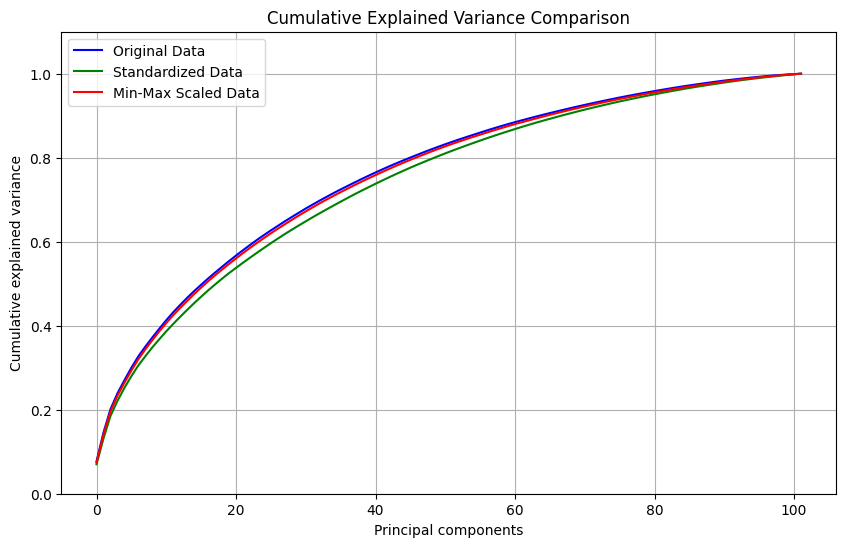

In [9]:
# compute all the n Principal Components for each dataset X_df, Xstd_df, and Xmm_df
pca_X_df = PCA()
pca_Xstd_df = PCA()
pca_Xmm_df = PCA()
pca_X_df.fit(X_df.values)
pca_Xstd_df.fit(Xstd_df)
pca_Xmm_df.fit(Xmm_df)

# visualize the curves of the cumulative explained variances and comment the results
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_X_df.explained_variance_ratio_), label='Original Data', color='blue')
plt.plot(np.cumsum(pca_Xstd_df.explained_variance_ratio_), label='Standardized Data', color='green')
plt.plot(np.cumsum(pca_Xmm_df.explained_variance_ratio_), label='Min-Max Scaled Data', color='red')
plt.legend()
plt.title('Cumulative Explained Variance Comparison')
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.ylim([0, 1.1])
plt.grid()

plt.show()

## Point 2.3 comment
The cumulative explained variance curve is similar across all three datasets, as expected. This is because, as previously mentioned, the original dataset exhibited low variance across most features, with responses confined to a range of 1 to 5. This constraint limits the impact of scaling processes on the explained variance.   
As anticipated, the X_mm dataset and the original dataset provide a better explanation of the variance compared to the X_std dataset. Normalization adjusts the range proportions, which can be useful when features have varying ranges. However, in this case, preserving the original range enhances interpretability, making it the preferred approach.

## Exercise 3. Dimensionality Reduction and PC Interpretation

In the cells below, do the following operations:  
1. For each one of the two dataframes _Xstd_df_, and _Xmm_df_, compute a new PCA for performing a dimensionality reduction with respect to $m$ dimensions. The value of $m$ must be $$m = \min\{m', 5\}\,,$$ where $m'$ is the value required for obtaining $33\%$ of the total variance.  
2. For both the cases, visualize all the PCs and give a name/interpretation to them. **Comment and motivate your interpretations**. If possible, **compare the differences among the results obtained** for _Xstd_df_ and _Xmm_df_.  
3. Perform the score graph for both the cases (_std_ and _mm_). If $m>3$, plot the score graph with respect to the first 3 PCs. All the **plots must show the names of the PCs on the axes** for better understanding the results.  
4. **Optional:** plot more score graphs, coloring the dots with respect to any label in the list _labels_ that you believe can be interesting. **Comment and analyze this optional plots**.

In [10]:
# compute m for Xstd_df
cumulative_variance_std = np.cumsum(pca_Xstd_df.explained_variance_ratio_)
m_std = np.argmax(cumulative_variance_std >= 0.33) + 1
m_std=min(m_std,5)

#compute the new PCA on Xstd_df
pca_Xstd_df_m = PCA(n_components=m_std)
pca_Xstd_df_m.fit(Xstd_df)

# compute m for Xmm_df
cumulative_variance_mm = np.cumsum(pca_Xmm_df.explained_variance_ratio_)
m_mm = np.argmax(cumulative_variance_mm >= 0.33) + 1
m_mm=min(m_mm,5)

# compute the new PCA on Xmm_df
pca_Xmm_df_m = PCA(n_components=m_mm)
pca_Xmm_df_m.fit(Xmm_df)

# example threshold for red lines
eps = 0.15

# retrieve the number of features and PCA components
n_features_std = Xstd_df.shape[1]
n_features_mm = Xmm_df.shape[1]
n_components = 5  # Number of PCs to visualize
components_std = pca_Xstd_df_m.components_
components_mm = pca_Xmm_df_m.components_

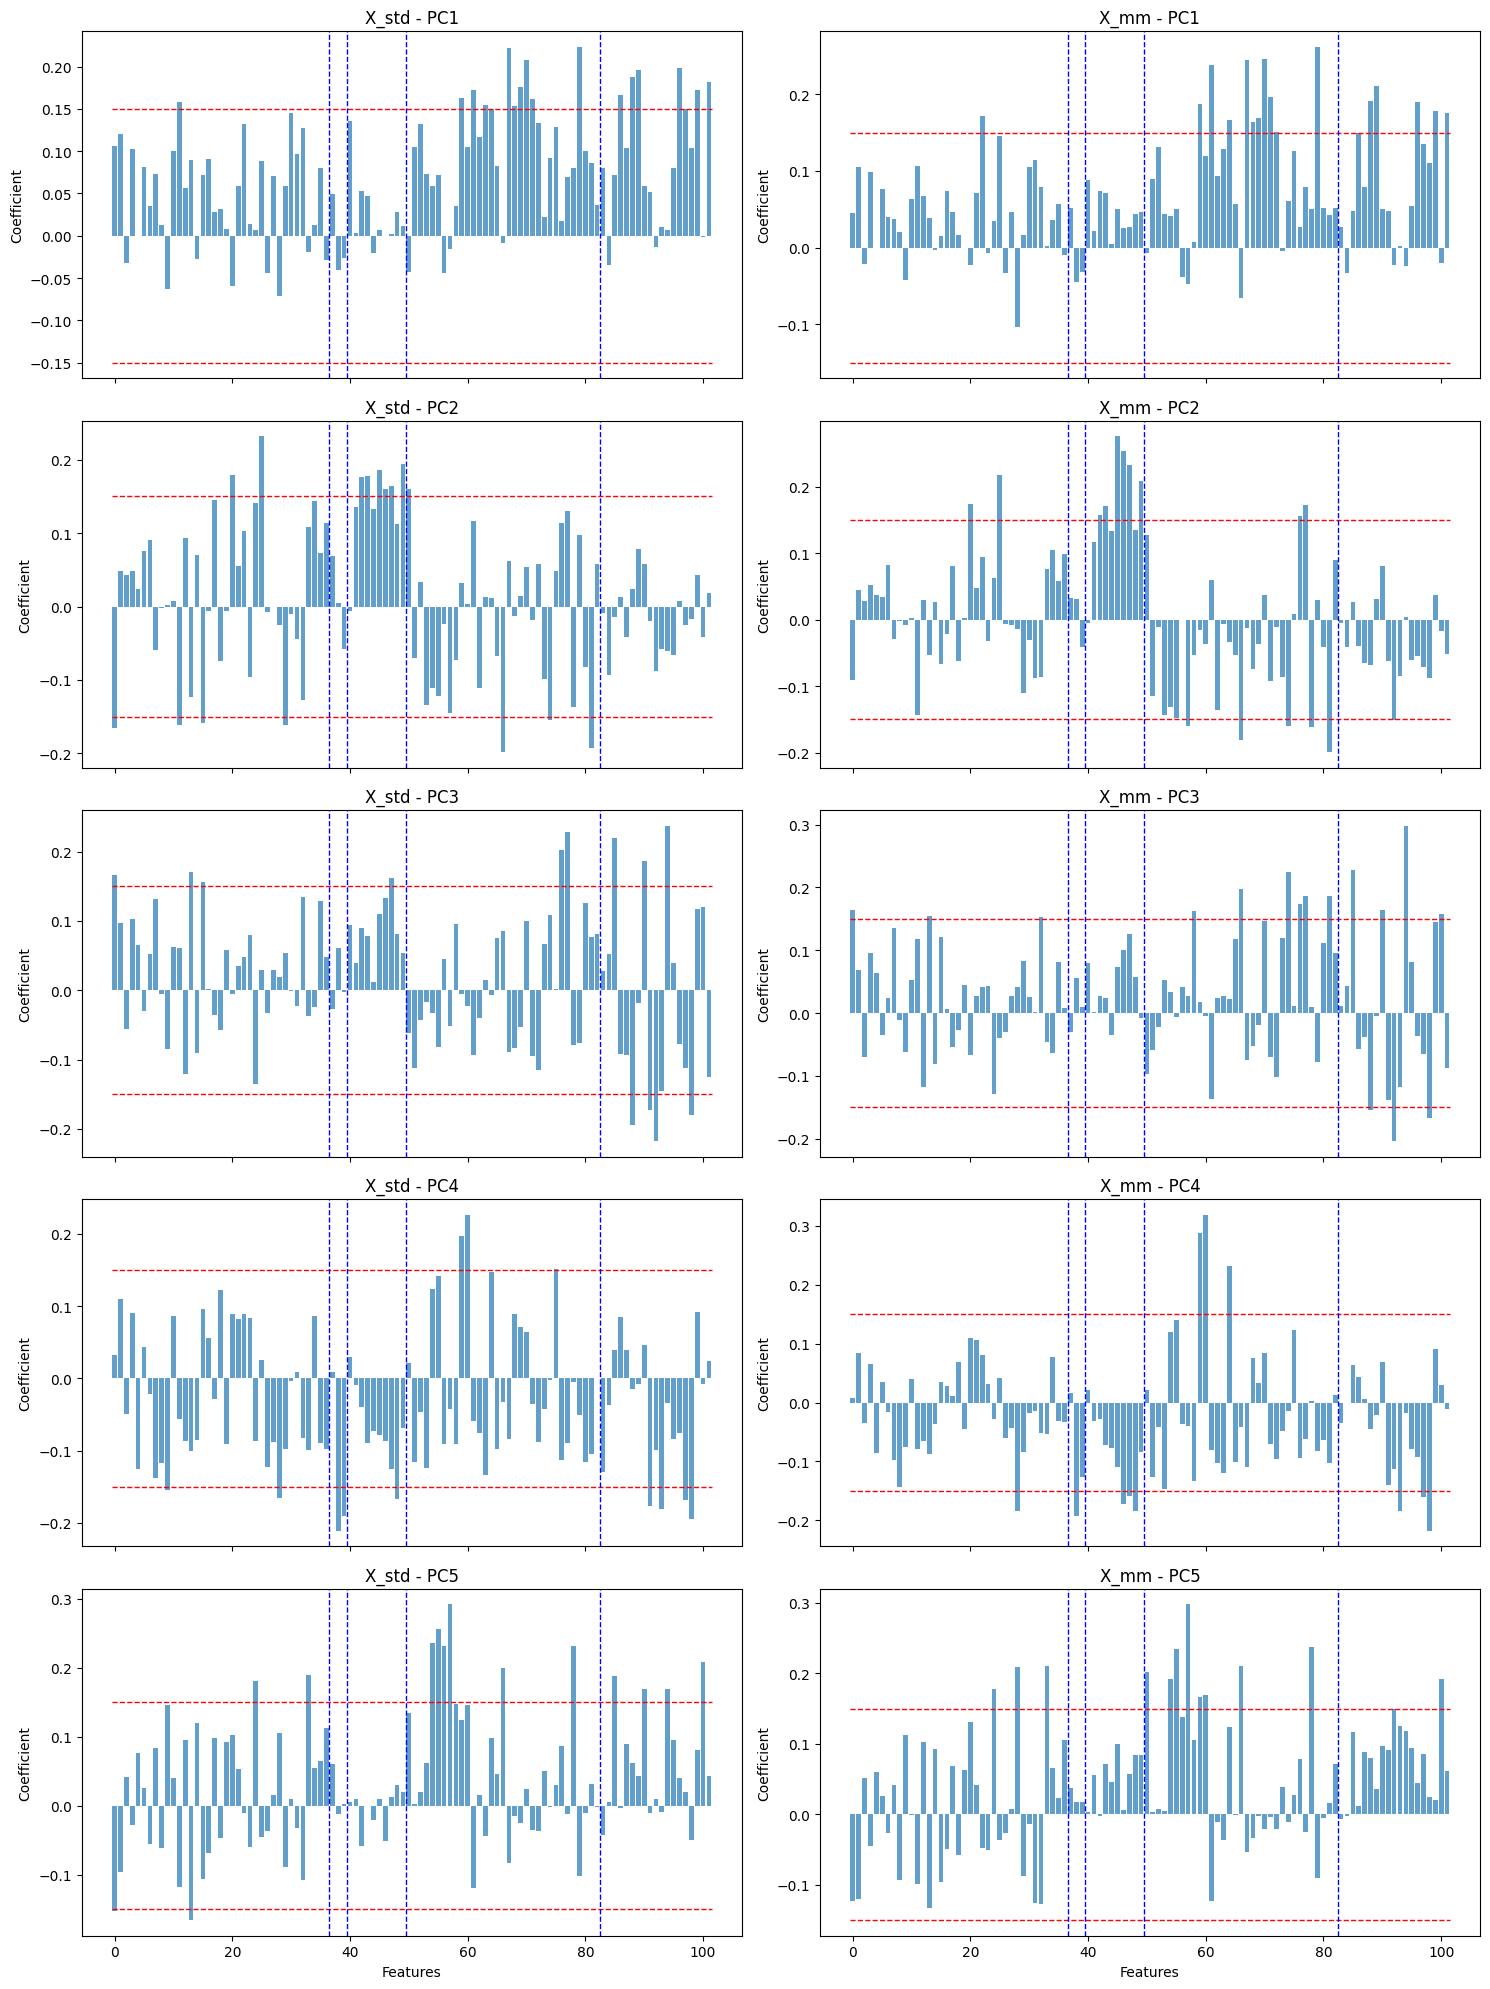

In [11]:
# create the grid layout for subplots
fig, axes = plt.subplots(5, 2, figsize=(15, 20), sharex=True)
axes = axes.flatten()

# highlight specific feature positions if applicable
highlight_positions = [36.5, 39.5, 49.5, 82.5]

# loop through the first 5 components for Xstd
for i in range(n_components):
    ax = axes[i * 2]  # Left column for Xstd
    ax.bar(np.arange(n_features_std), components_std[i, :], alpha=0.7)
    
    # qdd threshold lines
    ax.plot([-0.5, n_features_std - 0.5], [eps, eps], 'red', linestyle='--', linewidth=1)
    ax.plot([-0.5, n_features_std - 0.5], [-eps, -eps], 'red', linestyle='--', linewidth=1)
    
    # qdd vertical lines to highlight specific positions
    for x in highlight_positions:
        if x < n_features_std:
            ax.axvline(x=x, color='blue', linestyle='--', linewidth=1)
    
    # set title and labels
    ax.set_title(f'X_std - PC{i + 1}')
    ax.set_ylabel('Coefficient')

# Loop through the first 5 components for Xmm
for i in range(n_components):
    ax = axes[i * 2 + 1]  # Right column for Xmm
    ax.bar(np.arange(n_features_mm), components_mm[i, :], alpha=0.7)
    
    # add threshold lines
    ax.plot([-0.5, n_features_mm - 0.5], [eps, eps], 'red', linestyle='--', linewidth=1)
    ax.plot([-0.5, n_features_mm - 0.5], [-eps, -eps], 'red', linestyle='--', linewidth=1)
    
    # add vertical lines to highlight specific positions
    for x in highlight_positions:
        if x < n_features_mm:
            ax.axvline(x=x, color='blue', linestyle='--', linewidth=1)
    
    # set title and labels
    ax.set_title(f'X_mm - PC{i + 1}')
    ax.set_ylabel('Coefficient')

# set x-axis label for the last row subplots
axes[-2].set_xlabel('Features')
axes[-1].set_xlabel('Features')

# adjust layout for better readability
plt.tight_layout()
plt.show()

In [12]:
for ii in range(5):
    ind_great_pos_PCii = np.argwhere(pca_Xstd_df_m.components_[ii, :] >= eps).flatten()
    ind_great_neg_PCii = np.argwhere(pca_Xstd_df_m.components_[ii, :] <= -eps).flatten()
    
    great_pos_PCii = [Xstd_df.columns[i] for i in ind_great_pos_PCii]
    great_neg_PCii = [Xstd_df.columns[i] for i in ind_great_neg_PCii]
    
    print('')
    print(f'****************** PC_std{ii+1} **********************')
    print(f'HIGH-VALUED POSITIVE COMPONENTS: {great_pos_PCii}')
    print('')
    print(f'HIGH-VALUED NEGATIVE COMPONENTS: {great_neg_PCii}')
    print('*********************************************')
    print('')

for ii in range(5):
    ind_great_pos_PCii = np.argwhere(pca_Xmm_df_m.components_[ii, :] >= eps).flatten()
    ind_great_neg_PCii = np.argwhere(pca_Xmm_df_m.components_[ii, :] <= -eps).flatten()
    
    great_pos_PCii = [Xmm_df.columns[i] for i in ind_great_pos_PCii]
    great_neg_PCii = [Xmm_df.columns[i] for i in ind_great_neg_PCii]
    
    print('')
    print(f'****************** PC_mm{ii+1} **********************')
    print(f'HIGH-VALUED POSITIVE COMPONENTS: {great_pos_PCii}')
    print('')
    print(f'HIGH-VALUED NEGATIVE COMPONENTS: {great_neg_PCii}')
    print('*********************************************')
    print('')


****************** PC_std1 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Interests or hobbies', 'Biology', 'Reading', 'Foreign languages', 'Medicine', 'Art exhibitions', 'Religion', 'Countryside, outdoors', 'Dancing', 'Musical instruments', 'Theatre', 'Folk', 'Classical music', 'Musical', 'Swing, Jazz', 'Rock n roll', 'Latino', 'Opera']

HIGH-VALUED NEGATIVE COMPONENTS: []
*********************************************


****************** PC_std2 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Public speaking', 'Life struggles', 'Storm', 'Darkness', 'Spiders', 'Snakes', 'Rats', 'Dangerous dogs', 'Fear of public speaking']

HIGH-VALUED NEGATIVE COMPONENTS: ['Energy levels', 'Interests or hobbies', 'Happiness in life', 'New environment', 'Cars', 'Active sport', 'Adrenaline sports']
*********************************************


****************** PC_std3 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Energy levels', 'Number of friends', 'Happiness in li

## Point 3.2
Analyzing the graphs visually, divided horizontally using the threshold, applying it to both high-value positive and negative components, and vertically for each variable type: Personality, Health, Phobias, Interests, and Music, it is challenging to derive clear interpretations for the personality-related questions, as their values can mean both introvers and extrovers caratheristics, depending on the question.  
In contrast, features related to Health, Phobias, Interests, and Music are more straightforward to interpret because higher values directly reflect stronger associations with these traits. For instance, in PC1 across both the X_std and X_mm datasets, high coefficients for Interests and Music suggest that this component represents a curious and outgoing individual.  
A notable difference between the two datasets appears in PC5, particularly within the Phobias category. The X_mm dataset shows high coefficients for all phobias, implying a more fearful personality, whereas the X_std dataset exhibits low coefficients, which could be interpreted as a reflection of courage.  
Based on the most significant features within each principal component, it is possible to assign descriptive names to them. Given the minimal differences between the two datasets, we opted to use the same labels for corresponding principal components in both cases.  
We also printed the high-valued positive components and the high-valued negative components to analyze them more clearly in order to assign the following names:  
### PC1: Cultural and intellectual activities  
All the high-valued positive components are related to the cultural intellectual and artistic sphere, this could for example indicate an adult person with a great cultural background.  
### PC2: High Anxiety and low Energy   
In this case we have a contrast of high-valued positive components representing fears and vulnerabilities, with the high-valued negative components highlighting a very active and proposing person.  
### PC3: Social energy and modern lifestyle  
The positive components indicate a person with high levels of energy, a lot of friends and overall interested in a modern lifestyle. It could be a young person, ideally a female for a high level of the feature shopping.  
### PC4: Health and Scientific curiosity vs Alternative lifestyle  
For this PC we can observe that the high-valued positive components are all scientific features, and the negative ones indicate at the same time an alternative lifestyle and a healthy person.   
### PC5: Intellectual loneliness ("Nerd")  
For the last one the high-valued positive components indicate interest in all scientific fields and music, which implies a person with great intellectual capabilities, at the expense of sociality.


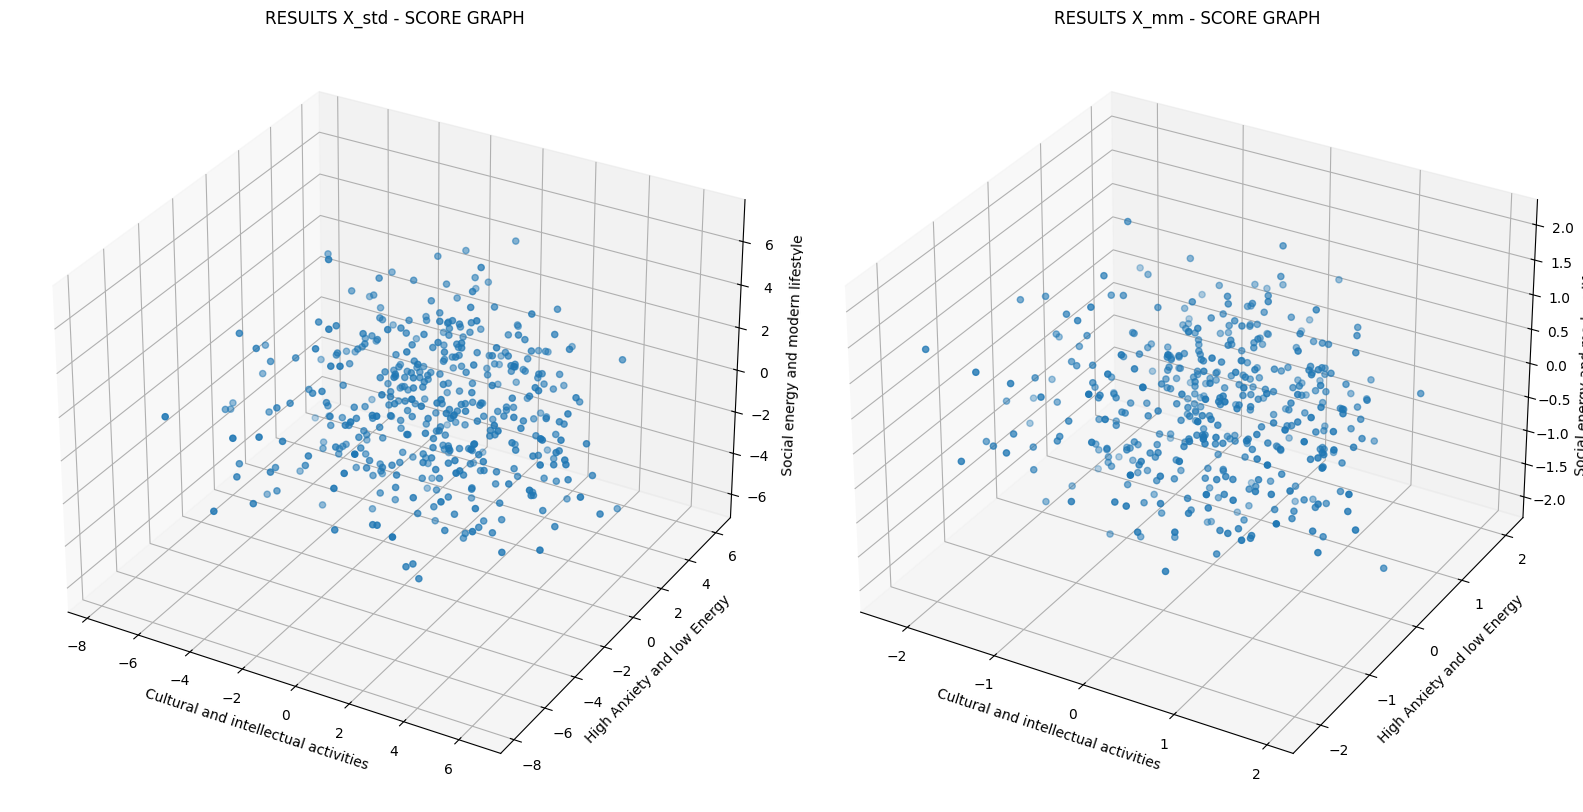

In [13]:
# score graph
Y_Xstd_df_m = pca_Xstd_df_m.transform(Xstd_df)
Y_Xmm_df_m = pca_Xmm_df_m.transform(Xmm_df)

# create figure
fig = plt.figure(figsize=(16, 8))

# first graph
ax1 = fig.add_subplot(121, projection='3d')  # Subplot 1
ax1.scatter(Y_Xstd_df_m[:, 0], Y_Xstd_df_m[:, 1], Y_Xstd_df_m[:, 2])
ax1.set_title('RESULTS X_std - SCORE GRAPH')
ax1.set_xlabel('Cultural and intellectual activities')
ax1.set_ylabel('High Anxiety and low Energy')
ax1.set_zlabel('Social energy and modern lifestyle')
ax1.grid()

# second graph
ax2 = fig.add_subplot(122, projection='3d')  # Subplot 2
ax2.scatter(Y_Xmm_df_m[:, 0], Y_Xmm_df_m[:, 1], Y_Xmm_df_m[:, 2])
ax2.set_title('RESULTS X_mm - SCORE GRAPH')
ax2.set_xlabel('Cultural and intellectual activities')
ax2.set_ylabel('High Anxiety and low Energy')
ax2.set_zlabel('Social energy and modern lifestyle')
ax2.grid()

plt.tight_layout() 
plt.show()

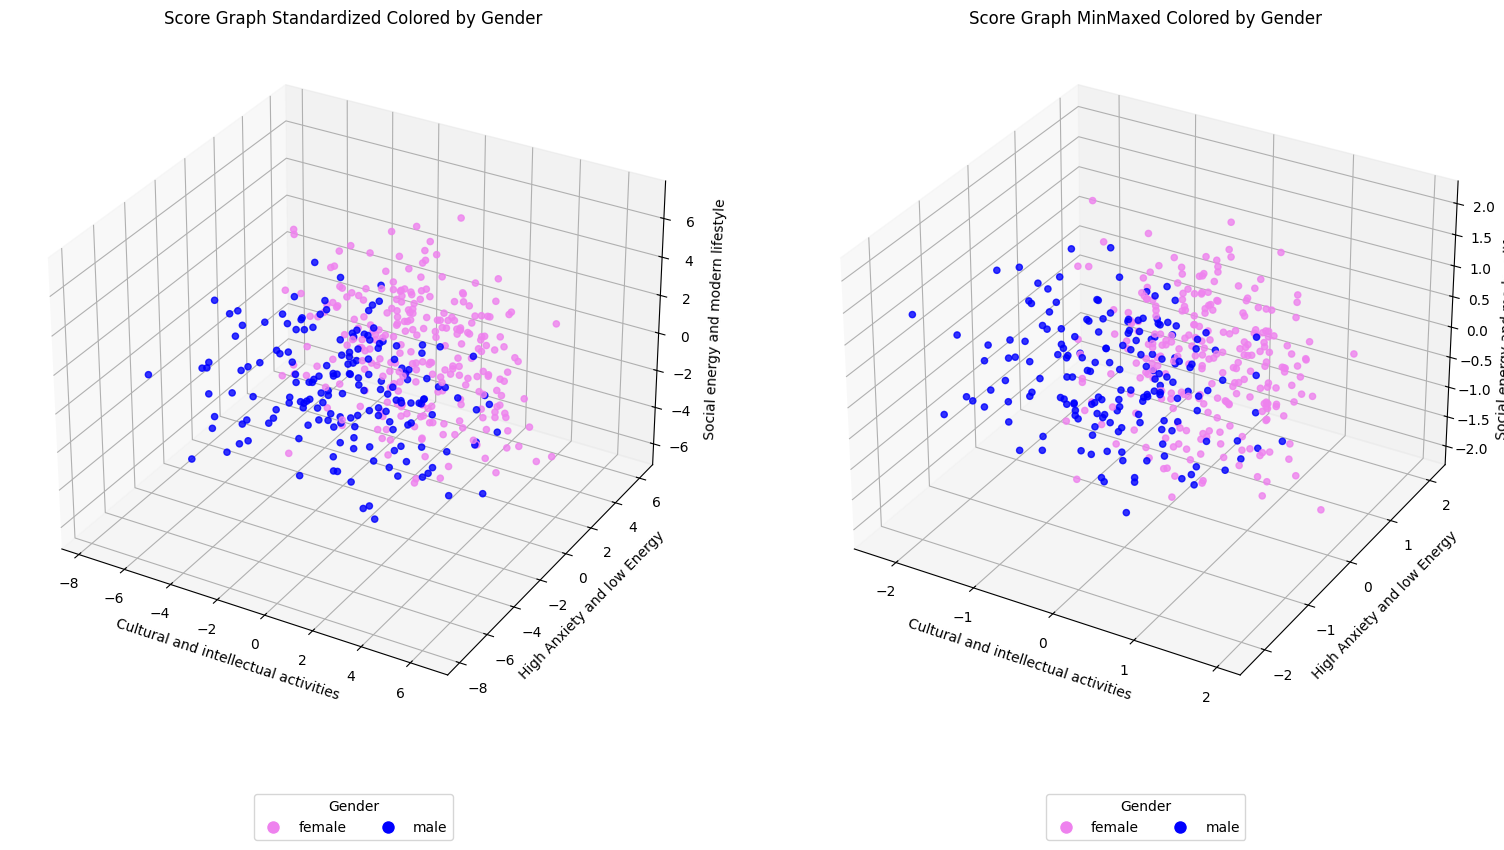

In [14]:
# create the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'projection': '3d'})

# first label
selected_label = 'Gender'  
label_values = X_df_labels[selected_label]

# colormap based on the label
if pd.api.types.is_numeric_dtype(label_values): 
    colors = label_values
    colorbar_label = f'{selected_label}'
else: 
    unique_labels = label_values.unique()
    
    #personalized colormap
    color_map = [ 'violet', 'blue', 'red', 'yellow', 'magenta', 'black', 'grey']  
    
    # color to label
    color_indices = [list(unique_labels).index(label) for label in label_values]
    colors = [color_map[i] for i in color_indices]
    
    colorbar_label = f'{selected_label} (categories)'

    # create the categorical legends
    legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[i], markersize=10, label=label)
                      for i, label in enumerate(unique_labels)]

# 3D graph of the components (PCA components)
sc = ax1.scatter(Y_Xstd_df_m[:, 0], Y_Xstd_df_m[:, 1], Y_Xstd_df_m[:, 2], c=colors, alpha=0.8)

# colorbar for numeric components
if pd.api.types.is_numeric_dtype(label_values):
    fig.colorbar(sc, ax=ax1, label=colorbar_label, pad=0.1)
else:
    # second legend
    ax1.legend(handles=legend_handles, title=selected_label, loc='upper center', ncol=len(unique_labels), bbox_to_anchor=(0.5, -0.1))

# axis labels
ax1.set_xlabel('Cultural and intellectual activities')
ax1.set_ylabel('High Anxiety and low Energy')
ax1.set_zlabel('Social energy and modern lifestyle')
ax1.set_title(f'Score Graph Standardized Colored by {selected_label}')

# colormap based on the label
if pd.api.types.is_numeric_dtype(label_values):  
    colors = label_values
    colorbar_label = f'{selected_label}'
else:  
    unique_labels = label_values.unique()
    
    #personalized colormap
    color_map = [ 'violet', 'blue', 'red', 'yellow', 'magenta', 'black', 'grey']  
    
    # color to label
    color_indices = [list(unique_labels).index(label) for label in label_values]
    colors = [color_map[i] for i in color_indices]
    
    colorbar_label = f'{selected_label} (categories)'

    # create the categorical legends
    legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[i], markersize=10, label=label)
                      for i, label in enumerate(unique_labels)]

# 3D graph of the components (PCA components)
sc = ax2.scatter(Y_Xmm_df_m[:, 0], Y_Xmm_df_m[:, 1], Y_Xmm_df_m[:, 2], c=colors, alpha=0.8)

# colorbar for numeric components
if pd.api.types.is_numeric_dtype(label_values):
    fig.colorbar(sc, ax=ax2, label=colorbar_label, pad=0.1)
else:
    # second legend
    ax2.legend(handles=legend_handles, title=selected_label, loc='upper center', ncol=len(unique_labels), bbox_to_anchor=(0.5, -0.1))

# axis labels
ax2.set_xlabel('Cultural and intellectual activities')
ax2.set_ylabel('High Anxiety and low Energy')
ax2.set_zlabel('Social energy and modern lifestyle')
ax2.set_title(f'Score Graph MinMaxed Colored by {selected_label}')


plt.tight_layout()

plt.show()

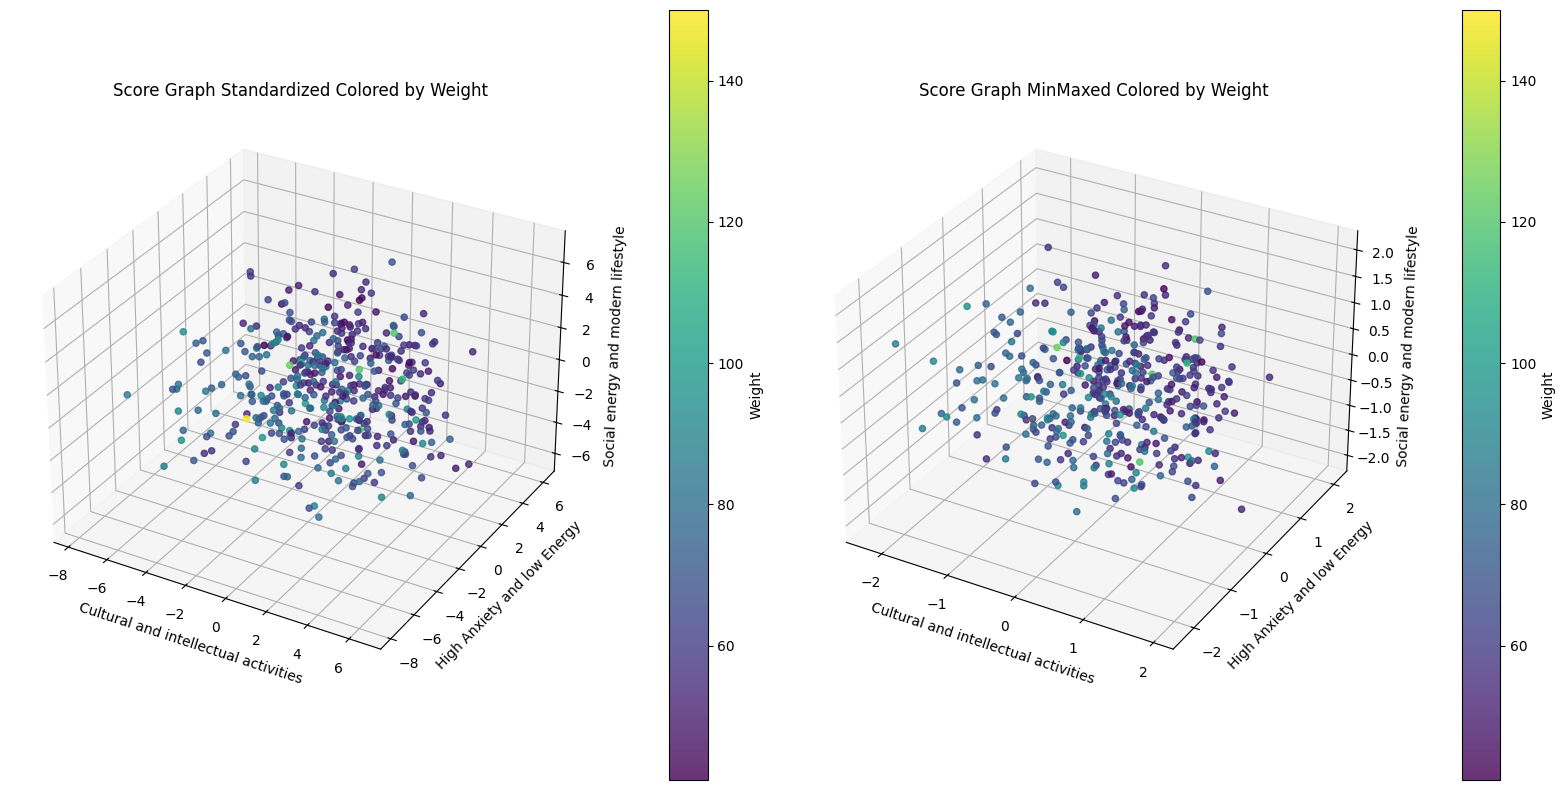

In [15]:
# create the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'projection': '3d'})

# first label
selected_label = 'Weight'  
label_values = X_df_labels[selected_label]

# colormap based on the label
if pd.api.types.is_numeric_dtype(label_values): 
    colors = label_values
    colorbar_label = f'{selected_label}'
else: 
    unique_labels = label_values.unique()
    
    #personalized colormap
    color_map = [ 'violet', 'blue', 'red', 'yellow', 'magenta', 'black', 'grey']  
    
    # color to label
    color_indices = [list(unique_labels).index(label) for label in label_values]
    colors = [color_map[i] for i in color_indices]
    
    colorbar_label = f'{selected_label} (categories)'

    # create the categorical legends
    legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[i], markersize=10, label=label)
                      for i, label in enumerate(unique_labels)]

# 3D graph of the components (PCA components)
sc = ax1.scatter(Y_Xstd_df_m[:, 0], Y_Xstd_df_m[:, 1], Y_Xstd_df_m[:, 2], c=colors, alpha=0.8)

# colorbar for numeric components
if pd.api.types.is_numeric_dtype(label_values):
    fig.colorbar(sc, ax=ax1, label=colorbar_label, pad=0.1)
else:
    # second legend
    ax1.legend(handles=legend_handles, title=selected_label, loc='upper center', ncol=len(unique_labels), bbox_to_anchor=(0.5, -0.1))

# axis labels
ax1.set_xlabel('Cultural and intellectual activities')
ax1.set_ylabel('High Anxiety and low Energy')
ax1.set_zlabel('Social energy and modern lifestyle')
ax1.set_title(f'Score Graph Standardized Colored by {selected_label}')

# colormap based on the label
if pd.api.types.is_numeric_dtype(label_values):  
    colors = label_values
    colorbar_label = f'{selected_label}'
else:  
    unique_labels = label_values.unique()
    
    #personalized colormap
    color_map = [ 'violet', 'blue', 'red', 'yellow', 'magenta', 'black', 'grey']  
    
    # color to label
    color_indices = [list(unique_labels).index(label) for label in label_values]
    colors = [color_map[i] for i in color_indices]
    
    colorbar_label = f'{selected_label} (categories)'

    # create the categorical legends
    legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[i], markersize=10, label=label)
                      for i, label in enumerate(unique_labels)]

# 3D graph of the components (PCA components)
sc = ax2.scatter(Y_Xmm_df_m[:, 0], Y_Xmm_df_m[:, 1], Y_Xmm_df_m[:, 2], c=colors, alpha=0.8)

# colorbar for numeric components
if pd.api.types.is_numeric_dtype(label_values):
    fig.colorbar(sc, ax=ax2, label=colorbar_label, pad=0.1)
else:
    # second legend
    ax2.legend(handles=legend_handles, title=selected_label, loc='upper center', ncol=len(unique_labels), bbox_to_anchor=(0.5, -0.1))

# axis labels
ax2.set_xlabel('Cultural and intellectual activities')
ax2.set_ylabel('High Anxiety and low Energy')
ax2.set_zlabel('Social energy and modern lifestyle')
ax2.set_title(f'Score Graph MinMaxed Colored by {selected_label}')


plt.tight_layout()

plt.show()

## Point 3.4
We attempted to plot score graphs for all possible labels, including 'Age', 'Height', 'Weight', 'Number of siblings', 'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type', and 'Home Type'. However, we have only presented two of them, one categorical and one numerical, that we considered to be the most important and significant: 'Gender' and 'Weight'.  
From the gender score graph, we can observe that the majority of females have high values in both the Anxiety principal component and the Social energy and modern lifestyle principal component. The association with anxiety is more immediate and clear, but the link to social energy and modern lifestyle also makes sense. This suggests that women, in general, tend to be more anxious while also exhibiting more social energy and interests.    
It’s worth noting that the "Social energy and modern lifestyle" principal component includes the feature "shopping," which could be relevant to our study. There are no significant differences observed with respect to the "Cultural and intellectual activities" principal component.  
In the weight score graph, the differences were not as noticeable, but we did observe some trends. Thinner individuals seemed to have more social energy and lead a more modern lifestyle, while also being more involved in cultural and intellectual activities compared to those with higher weight. However, the differences were not as pronounced as those seen in the gender graph.

## Exercise 4. $k$-Means

In the cells below, do the following operations:  
1. For each one of the two datasets (_std_ and _mm_), run the $k$-Means for clustering the data. In particular, **use the silohuette score for identify the best value for $k\in\{3, \ldots, 10\}$**.  
2. Plot the score graphs of exercise 3.3, adding the centroids of the cluster.  
3. Observing the centroids coordinates in the PC space, **give a name/interpretation to them**, exploiting the names you assigned to the PCs. **Comment and motivate your interpretations**.

In [16]:
# determinate the optimal k for X_std e X_mm
def find_optimal_k(data, k_range):
    best_k = k_range[0]
    best_score = -1
    for k in k_range:
        km = KMeans(n_clusters=k, random_state= random_seed)
        km.fit(data)
        score = silhouette_score(data, km.labels_)
        if score > best_score:
            best_k = k
            best_score = score
    return best_k

# dange of k
k_range = range(3, 11)

# find the optimal k for the two datasets
optimal_k_std = find_optimal_k(Y_Xstd_df_m, k_range)
optimal_k_mm = find_optimal_k(Y_Xmm_df_m, k_range)

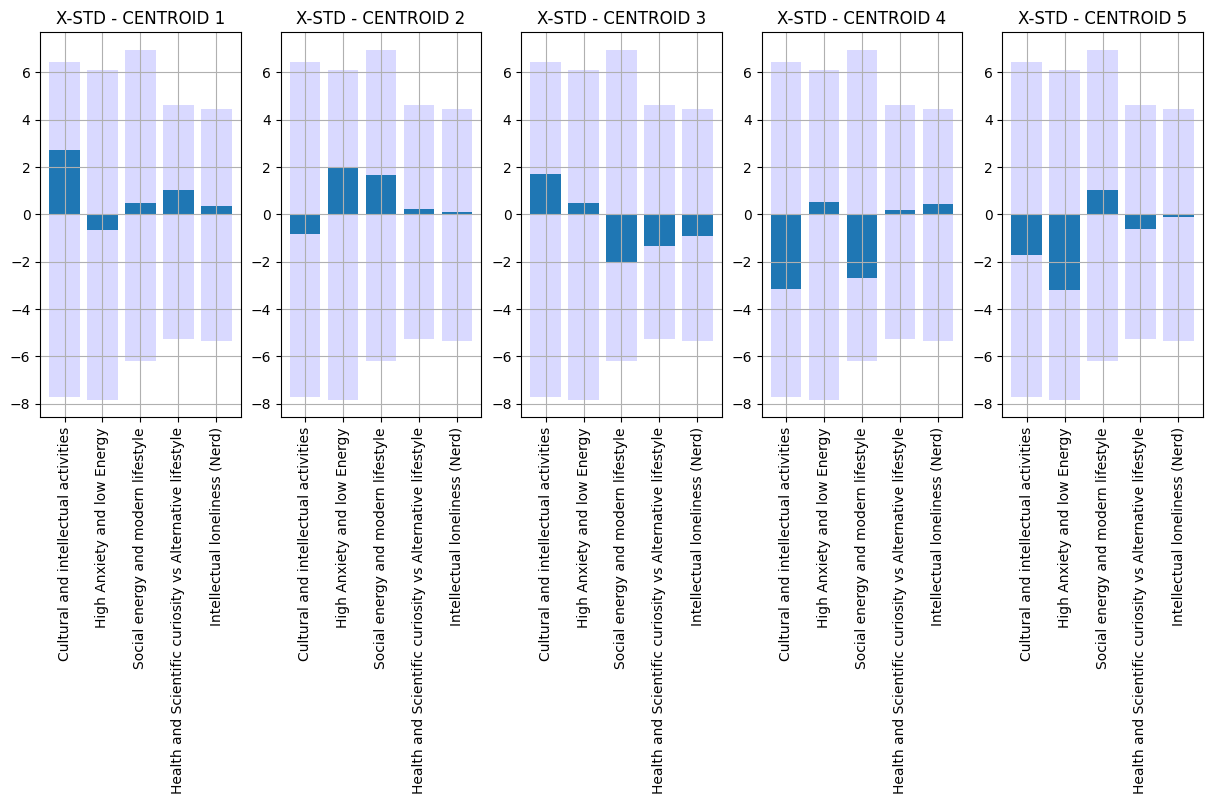

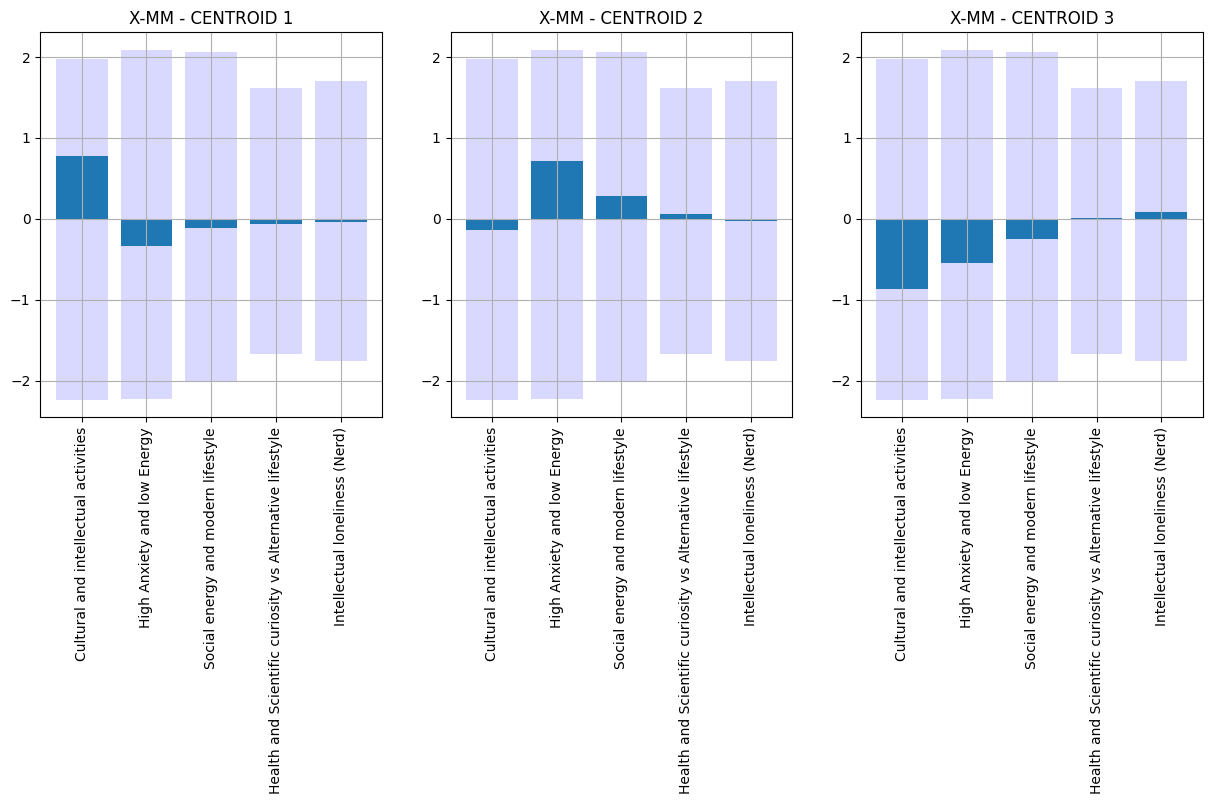

In [17]:
# clustering with optimal k
km_Xstd_df = KMeans(n_clusters=optimal_k_std, random_state=42).fit(Y_Xstd_df_m)
km_Xmm_df = KMeans(n_clusters=optimal_k_mm, random_state=42).fit(Y_Xmm_df_m)

maxs_Xstd_m = np.max(Y_Xstd_df_m, axis=0) 
mins_Xstd_m = np.min(Y_Xstd_df_m, axis=0) 

maxs_Xmm_m = np.max(Y_Xmm_df_m, axis=0)
mins_Xmm_m = np.min(Y_Xmm_df_m, axis=0)

#labels for clustering graphs
XstdPC1 = "Cultural and intellectual activities"
XstdPC2 = "High Anxiety and low Energy"
XstdPC3 = "Social energy and modern lifestyle"
XstdPC4 = "Health and Scientific curiosity vs Alternative lifestyle"
XstdPC5 = "Intellectual loneliness (Nerd)"

XmmPC1 = "Cultural and intellectual activities"
XmmPC2 = "High Anxiety and low Energy"
XmmPC3 = "Social energy and modern lifestyle"
XmmPC4 = "Health and Scientific curiosity vs Alternative lifestyle"
XmmPC5 = "Intellectual loneliness (Nerd)"

#graph for std dataset with optimal k
fig_Xstd, ax_Xstd = plt.subplots(1, optimal_k_std, figsize=(15, 5))
for ii in range(optimal_k_std):
    ax_Xstd[ii].bar(np.arange(km_Xstd_df.cluster_centers_.shape[1]), maxs_Xstd_m, color='blue', alpha=0.15)
    ax_Xstd[ii].bar(np.arange(km_Xstd_df.cluster_centers_.shape[1]), mins_Xstd_m, color='blue', alpha=0.15)
    ax_Xstd[ii].bar(np.arange(km_Xstd_df.cluster_centers_.shape[1]), km_Xstd_df.cluster_centers_[ii, :])
    ax_Xstd[ii].set_xticks(ticks=np.arange(km_Xstd_df.cluster_centers_.shape[1]))
    ax_Xstd[ii].set_xticklabels(labels=[XstdPC1, XstdPC2, XstdPC3, XstdPC4, XstdPC5], rotation=90)
    ax_Xstd[ii].grid(visible=True, which='both')
    ax_Xstd[ii].set_title(f'X-STD - CENTROID {ii+1}')

#graph for mm dataset with optimal k
fig_Xmm, ax_Xmm = plt.subplots(1, optimal_k_mm, figsize=(15, 5))
for ii in range(optimal_k_mm):
    ax_Xmm[ii].bar(np.arange(km_Xmm_df.cluster_centers_.shape[1]), maxs_Xmm_m, color='blue', alpha=0.15)
    ax_Xmm[ii].bar(np.arange(km_Xmm_df.cluster_centers_.shape[1]), mins_Xmm_m, color='blue', alpha=0.15)
    ax_Xmm[ii].bar(np.arange(km_Xmm_df.cluster_centers_.shape[1]), km_Xmm_df.cluster_centers_[ii, :])
    ax_Xmm[ii].set_xticks(ticks=np.arange(km_Xmm_df.cluster_centers_.shape[1]))
    ax_Xmm[ii].set_xticklabels(labels=[XmmPC1, XmmPC2, XmmPC3, XmmPC4, XmmPC5], rotation=90)
    ax_Xmm[ii].grid(visible=True, which='both')
    ax_Xmm[ii].set_title(f'X-MM - CENTROID {ii+1}')

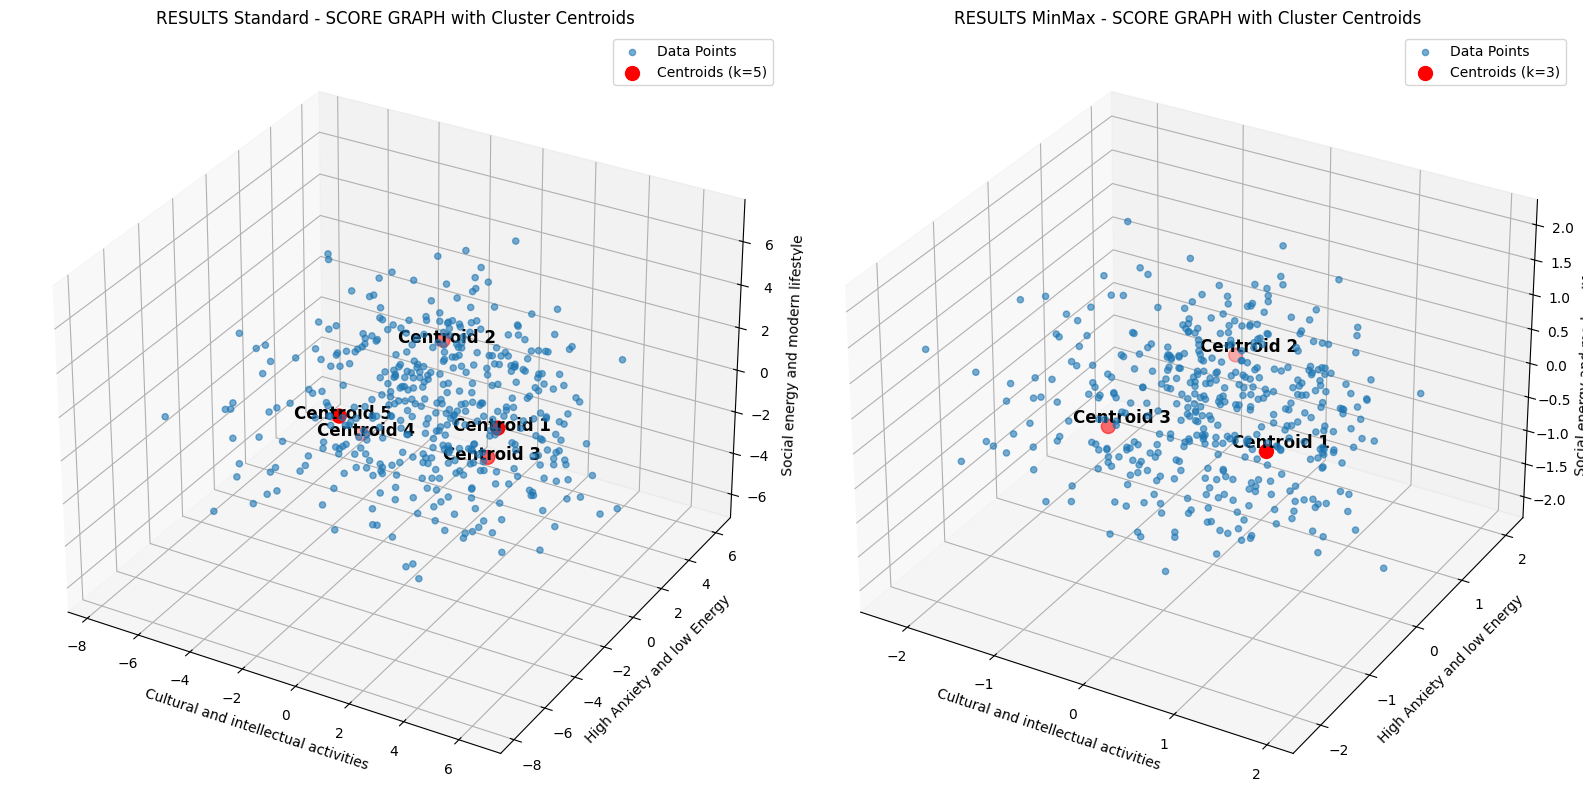

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'projection': '3d'})

# graph for X_std
ax1.scatter(Y_Xstd_df_m[:, 0], Y_Xstd_df_m[:, 1], Y_Xstd_df_m[:, 2], alpha=0.6, label='Data Points')
centroids_std = km_Xstd_df.cluster_centers_[:, :3] 
ax1.scatter(centroids_std[:, 0], centroids_std[:, 1], centroids_std[:, 2], color='red', s=100, marker='o', label=f'Centroids (k={optimal_k_std})')

# label the centroids with their numbers
for i, centroid in enumerate(centroids_std):
    ax1.text(centroid[0] + 0.1, centroid[1] + 0.1, centroid[2] + 0.1, 
             f'Centroid {i+1}', color='black', fontsize=12, weight='bold', ha='center', va='center')

ax1.set_title('RESULTS Standard - SCORE GRAPH with Cluster Centroids')
ax1.set_xlabel('Cultural and intellectual activities')
ax1.set_ylabel('High Anxiety and low Energy')
ax1.set_zlabel('Social energy and modern lifestyle')
ax1.legend()
ax1.grid(True)

# graph for X_mm
ax2.scatter(Y_Xmm_df_m[:, 0], Y_Xmm_df_m[:, 1], Y_Xmm_df_m[:, 2], alpha=0.6, label='Data Points')
centroids_mm = km_Xmm_df.cluster_centers_[:, :3] 
ax2.scatter(centroids_mm[:, 0], centroids_mm[:, 1], centroids_mm[:, 2], color='red', s=100, marker='o', label=f'Centroids (k={optimal_k_mm})')

# label the centroids with their numbers
for i, centroid in enumerate(centroids_mm):
    ax2.text(centroid[0] + 0.1, centroid[1] + 0.1, centroid[2] + 0.1, 
             f'Centroid {i+1}', color='black', fontsize=12, weight='bold', ha='center', va='center')

ax2.set_title('RESULTS MinMax - SCORE GRAPH with Cluster Centroids')
ax2.set_xlabel('Cultural and intellectual activities')
ax2.set_ylabel('High Anxiety and low Energy')
ax2.set_zlabel('Social energy and modern lifestyle')
ax2.legend()
ax2.grid(True)

plt.tight_layout()

plt.show()


## Point 4.3
We examined both bar graphs and score graphs to understand the clusters. The bar graphs were easier to understand and gave us more clear insights, while the score graphs were harder to interpret. Even though the score graphs were less clear, both types of graphs helped us identify the main features of each cluster, allowing us to understand the patterns in the data.  
We then proced to assign the following names:    
### Centroid 1 std: Cultural and intellectual activities
This group consists of people who are highly interested in cultural and intellectual activities. They tend to have a good level of energy and manage stress well, maintaining a calm attitude. While deeply engaged in intellectual pursuits, they remain socially active and well integrated into modern life.    
### Centroid 2 std: Anxious but Social
These individuals experience high levels of anxiety but still enjoy social activities. While they engage in modern life and maintain a balance between social and intellectual pursuits, their social involvement is often accompanied by stress. Despite this, they remain active and connected to others.  
### Centroid 3 std: Intellectually Lonely but Active
This group is more introverted and focused on intellectual pursuits. They may prefer alternative
lifestyles. They tend to avoid social situations and might not be very socially active.  
### Centroid 4 std: Anti-Social and not Curios: 
This group consists of individuals who have little interest in cultural and intellectual activities and prefer to avoid social interactions.   
### Centroid 5 std: Energetic and Social
This group has high energy despite lacking interest in intellectual and cultural activities. However, they maintain an active social life.  
### Centroid 1 mm: Balanced and Active lifestyle  
These individuals are somewhat involved in cultural and intellectual activities, but they don’t have extreme levels of anxiety or social energy. They tend to be balanced and neutral in their social lives, not very active or anxious.  
### Centroid 2 mm: Socially Engaged but Anxious
This group experiences high levels of anxiety but remains socially engaged and actively participates in modern life.   
### Centroid 3 mm: Energetic but Culturally Detached
This group possesses high energy but shows little interest in cultural or intellectual activities. While their social energy is moderate, they prefer physical or more active engagements rather than intellectual pursuits.  

We found several key similarities between the clusters. For example, both datasets show a group of individuals who are social and anxious, with low energy, represented by the second centroid in both X_std and X_mm. These individuals balance social activities and modern lifestyles well. Similarly, both datasets also contain a cluster with introverted, energetic individuals who have low social energy and intellectual curiosity, which appears as the third centroid in both sets.  
Additionally, in both datasets, we observe a group of individuals who are intellectually engaged but anxious, with moderate social activity, seen in the first centroid of X_std and the first centroid of X_mm. Finally, both datasets have a group characterized by low energy, social disengagement, and moderate anxiety, which are represented in the fifth centroid of X_std and the third centroid of X_mm.

## Exercise 5. Cluster Evaluations

In the cells below, do the following operations:  
1. For each one of the two datasets (_std_ and _mm_), perform an **external evaluation** of the clustering obtained at exercise 4.1 with respect to one or more labels in the list _labels_. **Comment the results, comparing the evaluation with the interpretation you gave at exercise 4.3**.   
2. For each one of the two datasets (_std_ and _mm_), perform an **internal evaluation** of each cluster, with respect to the silohuette score. **Comment the results**. 

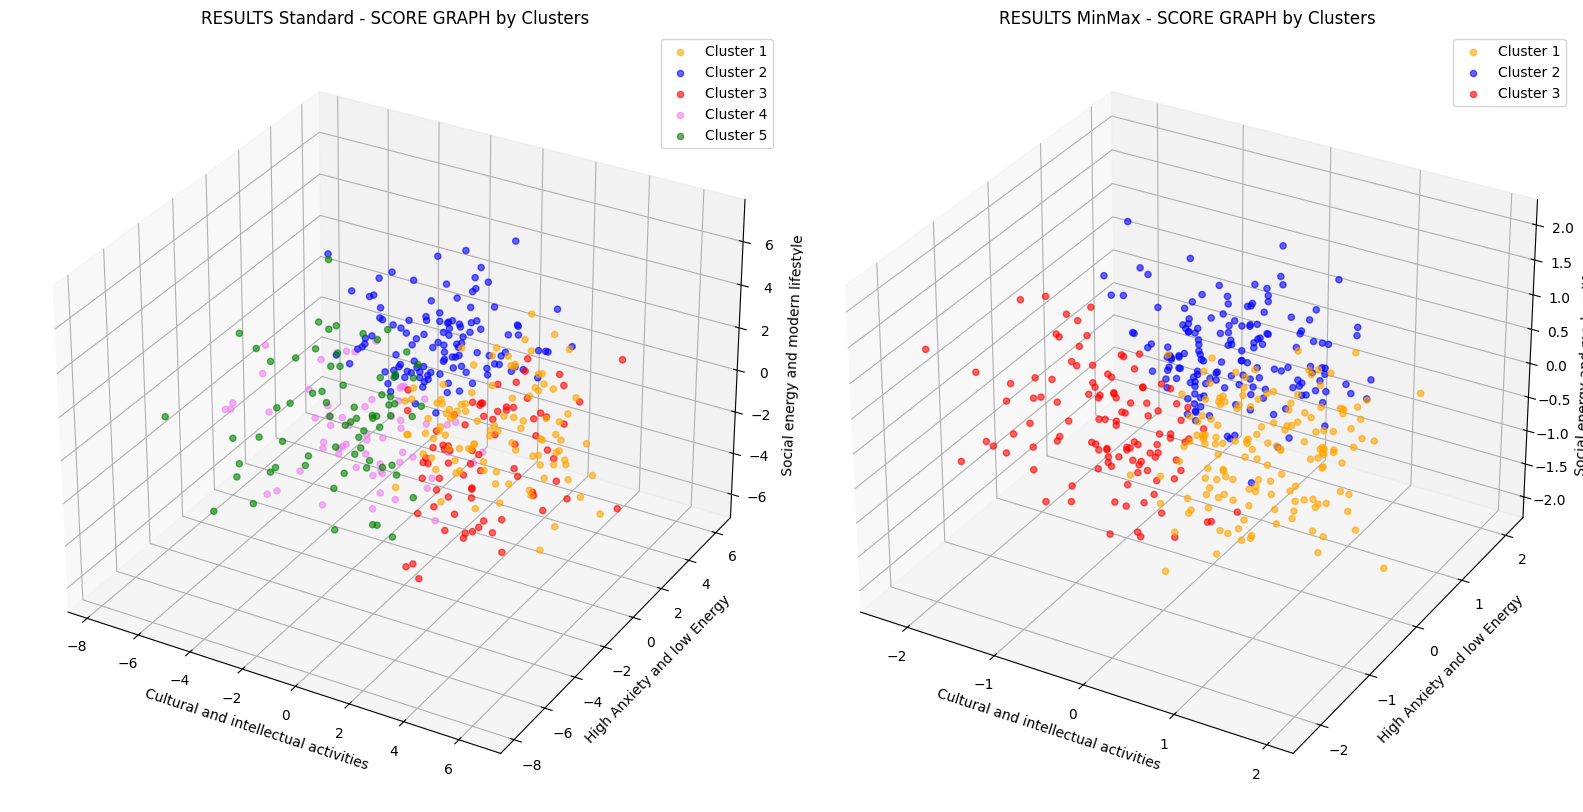

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'projection': '3d'})

# Assign cluster labels to data points
labels_std = km_Xstd_df.labels_
labels_mm = km_Xmm_df.labels_

# Define a fixed colormap for clusters
color_map = [ 'orange', 'blue', 'red', 'violet', 'green', 'black', 'grey']

# Graph for X_std
for cluster in range(optimal_k_std):
    cluster_points = Y_Xstd_df_m[labels_std == cluster]  # Filter points for the current cluster
    ax1.scatter(
        cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], 
        label=f'Cluster {cluster + 1}', alpha=0.6, color=color_map[cluster % len(color_map)]
    )

ax1.set_title('RESULTS Standard - SCORE GRAPH by Clusters')
ax1.set_xlabel('Cultural and intellectual activities')
ax1.set_ylabel('High Anxiety and low Energy')
ax1.set_zlabel('Social energy and modern lifestyle')
ax1.legend()
ax1.grid(True)

# Graph for X_mm
for cluster in range(optimal_k_mm):
    cluster_points = Y_Xmm_df_m[labels_mm == cluster]  # Filter points for the current cluster
    ax2.scatter(
        cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], 
        label=f'Cluster {cluster + 1}', alpha=0.6, color=color_map[cluster % len(color_map)]
    )

ax2.set_title('RESULTS MinMax - SCORE GRAPH by Clusters')
ax2.set_xlabel('Cultural and intellectual activities')
ax2.set_ylabel('High Anxiety and low Energy')
ax2.set_zlabel('Social energy and modern lifestyle')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


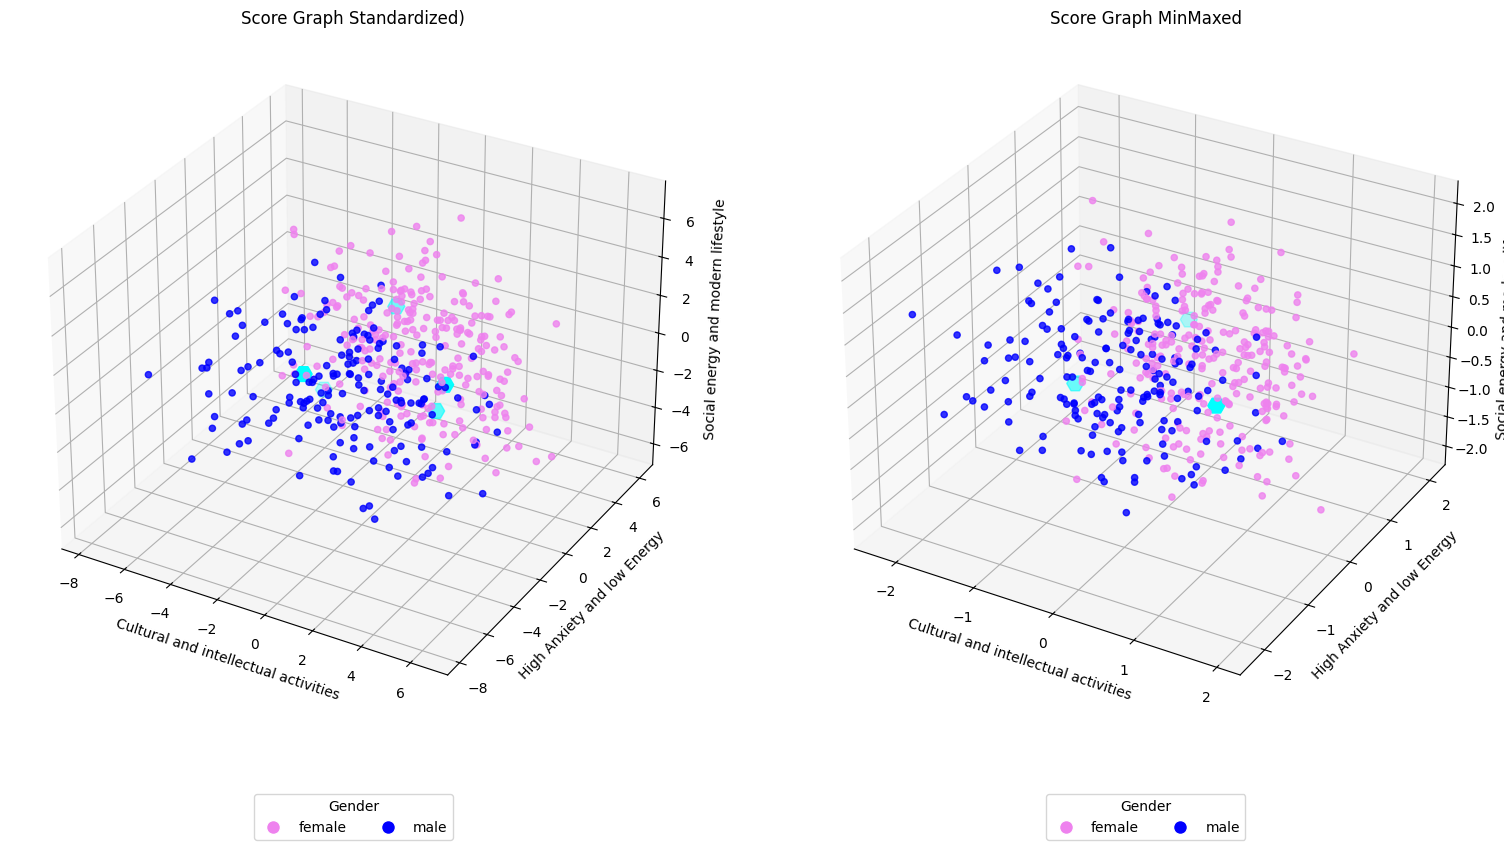

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'projection': '3d'})

# plot for X_std
selected_label = 'Gender' 
label_values = X_df_labels[selected_label]

if pd.api.types.is_numeric_dtype(label_values):
    colors = label_values
    colorbar_label = f'{selected_label}'
else:

    #personalized colormap
    color_map = [ 'violet', 'blue', 'red', 'yellow', 'magenta', 'black', 'grey']
    unique_labels = label_values.unique()
    # color to label
    color_indices = [list(unique_labels).index(label) for label in label_values]
    colors = [color_map[i] for i in color_indices]

    colorbar_label = f'{selected_label} (categories)'
    legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[i], markersize=10, label=label)
                      for i, label in enumerate(unique_labels)]

# add optimal number of centroids to score graph
centroids_std = km_Xstd_df.cluster_centers_[:, :3]
sc1 = ax1.scatter(Y_Xstd_df_m[:, 0], Y_Xstd_df_m[:, 1], Y_Xstd_df_m[:, 2], c=colors, alpha=0.8, label='Data Points')
ax1.scatter(centroids_std[:, 0], centroids_std[:, 1], centroids_std[:, 2], 
            color='cyan', s=150, marker='H', label=f'Centroids (k={optimal_k_std})')
    
if pd.api.types.is_numeric_dtype(label_values):
    fig.colorbar(sc1, ax=ax1, label=colorbar_label, pad=0.1)
else:
    ax1.legend(handles=legend_handles, title=selected_label, loc='upper center', ncol=len(unique_labels), bbox_to_anchor=(0.5, -0.1))

ax1.set_title('Score Graph Standardized)')
ax1.set_xlabel('Cultural and intellectual activities')
ax1.set_ylabel('High Anxiety and low Energy')
ax1.set_zlabel('Social energy and modern lifestyle')


if pd.api.types.is_numeric_dtype(label_values):
    colors = label_values
    colorbar_label = f'{selected_label}'
else:
    #personalized colormap
    color_map = [ 'violet', 'blue', 'red', 'yellow', 'magenta', 'black', 'grey']
    unique_labels = label_values.unique()
    # color to label
    color_indices = [list(unique_labels).index(label) for label in label_values]
    colors = [color_map[i] for i in color_indices]
    colorbar_label = f'{selected_label} (categories)'
    legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[i], markersize=10, label=label)
                      for i, label in enumerate(unique_labels)]
    
# add optimal number of centroids to score graph
centroids_mm = km_Xmm_df.cluster_centers_[:, :3]
sc2 = ax2.scatter(Y_Xmm_df_m[:, 0], Y_Xmm_df_m[:, 1], Y_Xmm_df_m[:, 2], c=colors, alpha=0.8, label='Data Points')
ax2.scatter(centroids_mm[:, 0], centroids_mm[:, 1], centroids_mm[:, 2], 
            color='cyan', s=150, marker='H', label=f'Centroids (k={optimal_k_mm})')
    
if pd.api.types.is_numeric_dtype(label_values):
    fig.colorbar(sc2, ax=ax2, label=colorbar_label, pad=0.1)
else:
    ax2.legend(handles=legend_handles, title=selected_label, loc='upper center', ncol=len(unique_labels), bbox_to_anchor=(0.5, -0.1))

ax2.set_title('Score Graph MinMaxed')
ax2.set_xlabel('Cultural and intellectual activities')
ax2.set_ylabel('High Anxiety and low Energy')
ax2.set_zlabel('Social energy and modern lifestyle')

# adjust layout
plt.tight_layout()
plt.show()

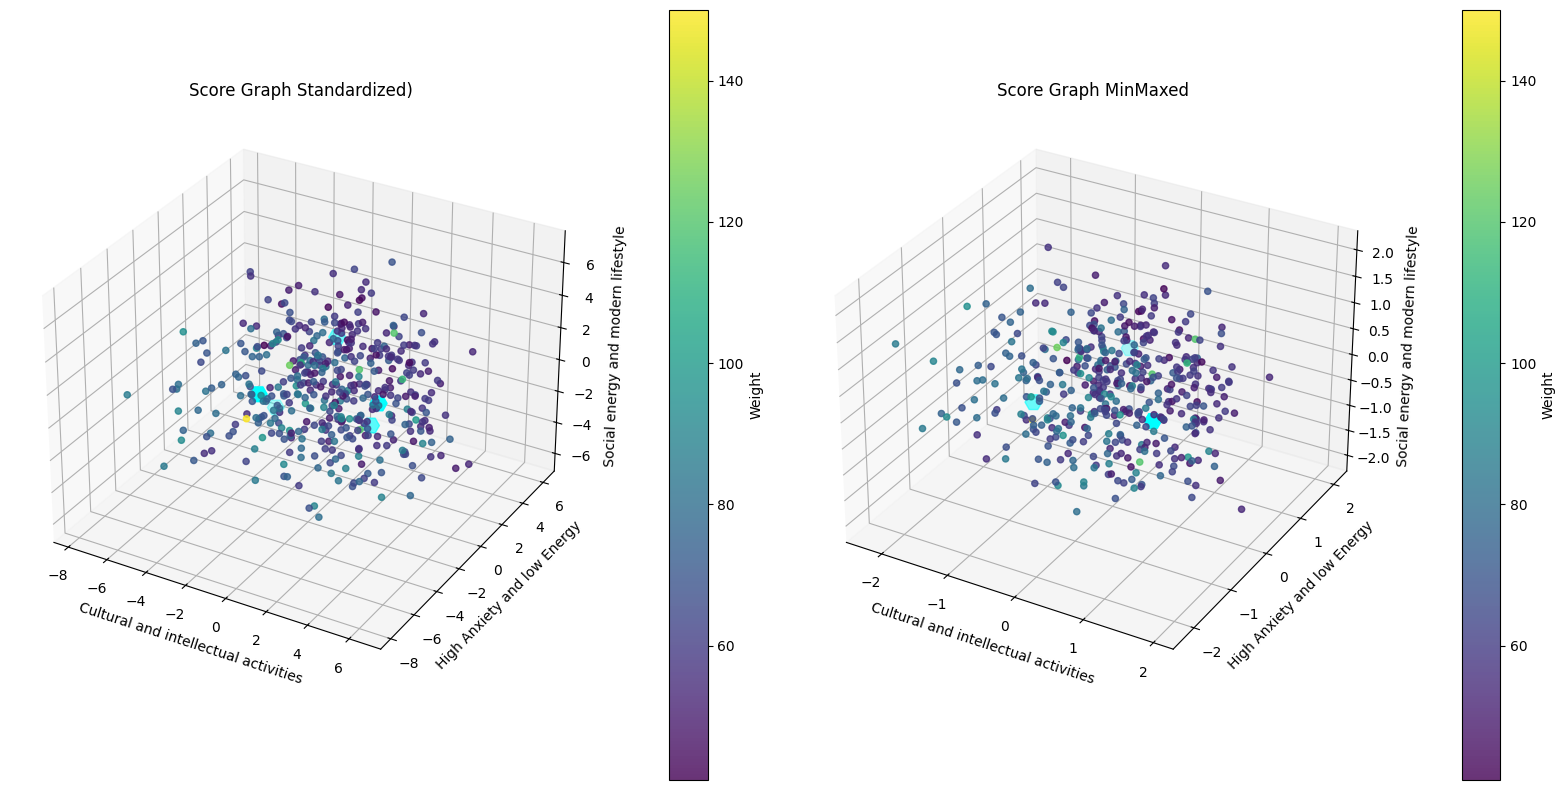

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'projection': '3d'})

# plot for X_std
selected_label = 'Weight' 
label_values = X_df_labels[selected_label]

if pd.api.types.is_numeric_dtype(label_values):
    colors = label_values
    colorbar_label = f'{selected_label}'
else:
    unique_labels = label_values.unique()
    color_map = plt.colormaps['tab20'](np.linspace(0, 1, len(unique_labels)))
    color_indices = [list(unique_labels).index(label) for label in label_values]
    colors = color_map[color_indices]
    colorbar_label = f'{selected_label} (categories)'
    legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[i], markersize=10, label=label)
                      for i, label in enumerate(unique_labels)]

# add optimal number of centroids to score graph
centroids_std = km_Xstd_df.cluster_centers_[:, :3]
sc1 = ax1.scatter(Y_Xstd_df_m[:, 0], Y_Xstd_df_m[:, 1], Y_Xstd_df_m[:, 2], c=colors, alpha=0.8, label='Data Points')
ax1.scatter(centroids_std[:, 0], centroids_std[:, 1], centroids_std[:, 2], 
            color='cyan', s=150, marker='H', label=f'Centroids (k={optimal_k_std})')
    
if pd.api.types.is_numeric_dtype(label_values):
    fig.colorbar(sc1, ax=ax1, label=colorbar_label, pad=0.1)
else:
    ax1.legend(handles=legend_handles, title=selected_label, loc='upper center', ncol=len(unique_labels), bbox_to_anchor=(0.5, -0.1))

ax1.set_title('Score Graph Standardized)')
ax1.set_xlabel('Cultural and intellectual activities')
ax1.set_ylabel('High Anxiety and low Energy')
ax1.set_zlabel('Social energy and modern lifestyle')


if pd.api.types.is_numeric_dtype(label_values):
    colors = label_values
    colorbar_label = f'{selected_label}'
else:
    unique_labels = label_values.unique()
    color_map = plt.colormaps['tab20'](np.linspace(0, 1, len(unique_labels)))
    color_indices = [list(unique_labels).index(label) for label in label_values]
    colors = color_map[color_indices]
    colorbar_label = f'{selected_label} (categories)'
    legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[i], markersize=10, label=label)
                      for i, label in enumerate(unique_labels)]
    
# add optimal number of centroids to score graph
centroids_mm = km_Xmm_df.cluster_centers_[:, :3]
sc2 = ax2.scatter(Y_Xmm_df_m[:, 0], Y_Xmm_df_m[:, 1], Y_Xmm_df_m[:, 2], c=colors, alpha=0.8, label='Data Points')
ax2.scatter(centroids_mm[:, 0], centroids_mm[:, 1], centroids_mm[:, 2], 
            color='cyan', s=150, marker='H', label=f'Centroids (k={optimal_k_mm})')
    
if pd.api.types.is_numeric_dtype(label_values):
    fig.colorbar(sc2, ax=ax2, label=colorbar_label, pad=0.1)
else:
    ax2.legend(handles=legend_handles, title=selected_label, loc='upper center', ncol=len(unique_labels), bbox_to_anchor=(0.5, -0.1))

ax2.set_title('Score Graph MinMaxed')
ax2.set_xlabel('Cultural and intellectual activities')
ax2.set_ylabel('High Anxiety and low Energy')
ax2.set_zlabel('Social energy and modern lifestyle')

# adjust layout
plt.tight_layout()
plt.show()

## Point 5.1

As we did in section 3.4, we decided to plot the score graph for two features: gender and weight. Once again, gender proved to be the more informative feature for understanding how the clusters could group individuals.  
Visually analyzing the Standardized dataset, we observe that centroids 1 and 3 (which we referred to in section 4.3 as "Cultural and intellectual activities" and "Intellectually Lonely but Active") are not clearly distinguished by gender. These clusters seem to represent a mix of both males and females.  
However, centroid 2, labeled "Anxious but Social", predominantly represents the female population, which seems plausible. Similarly, the "Anxious and Isolated" and "Anti-Social and Curious" centroids are mostly male, which is also a reasonable interpretation.  
For the MinMaxed dataset, we notice that the first centroid, "Balanced and Active Lifestyle," closely mirrors the first and third centroids from the Standardized dataset. This suggests that it could be representative of both genders. The second centroid, "Socially Engaged but Anxious", and the third, "Energetic but Culturally Detached", are predominantly female and male, respectively, consistent with the patterns observed in the Standardized dataset and our previous interpretations.  
In the weight score graphs, we can draw similar conclusions to those in section 3.4. While the differences are not as pronounced as those observed for gender, we can still observe that, in the MinMaxed dataset with only three centroids, the first centroid represents a balanced group. The second centroid contains individuals with lower weight, while the third cluster contains individuals with higher weight, aligning with the observations in section 3.4.

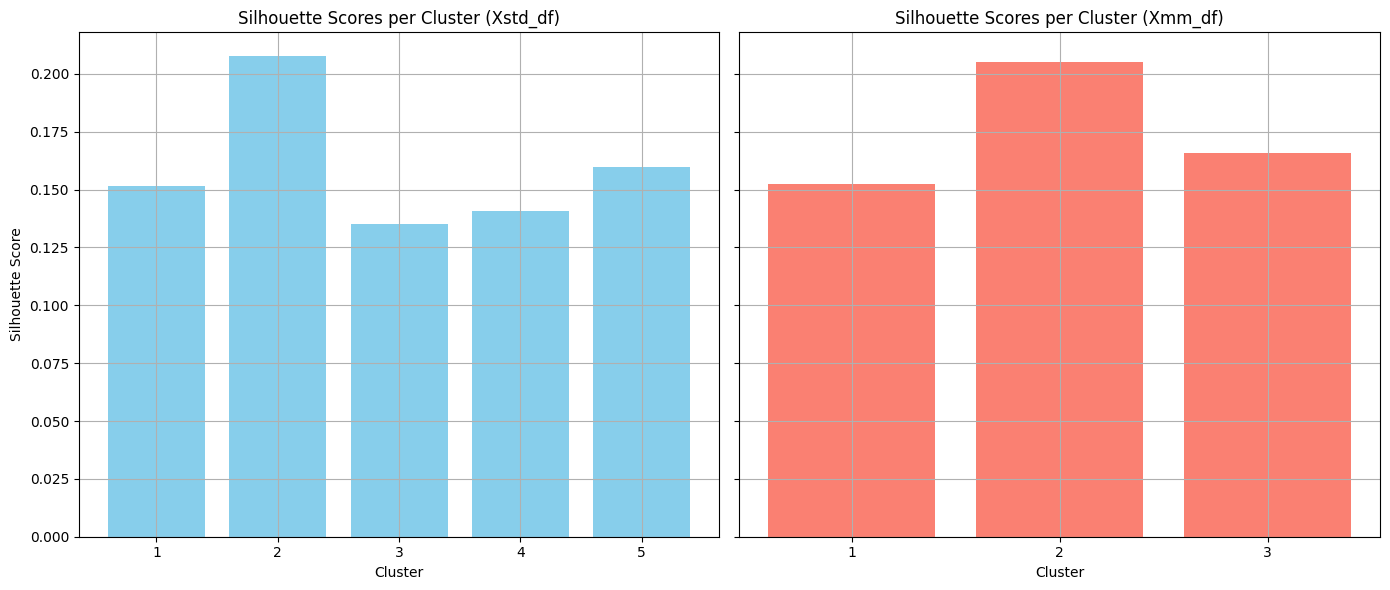

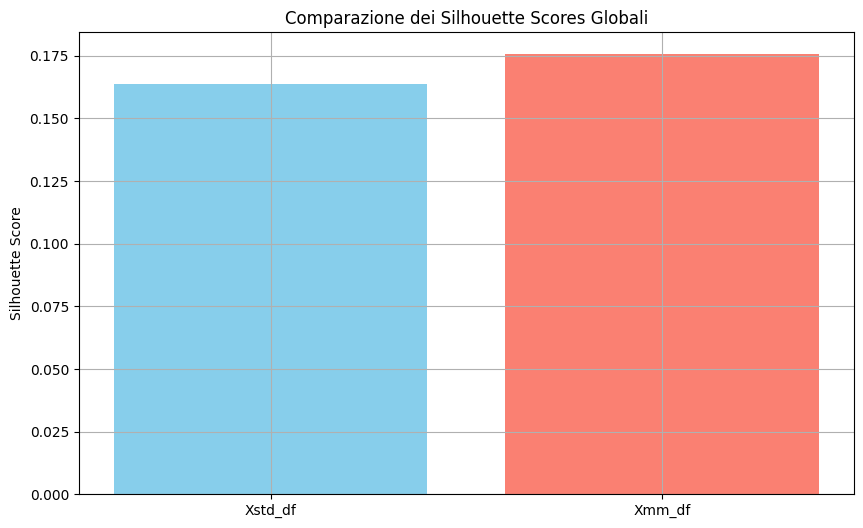

In [22]:
# Global Silhouette Score for X_std
sil_score_std = silhouette_score(Y_Xstd_df_m, km_Xstd_df.labels_)

# Silhouette Scores for every feature
silhouette_vals_std = silhouette_samples(Y_Xstd_df_m, km_Xstd_df.labels_)

# Silhouette Scores for every cluster
sil_scores_per_cluster_std = []
for cluster in range(optimal_k_std):
    cluster_vals = silhouette_vals_std[km_Xstd_df.labels_ == cluster]
    sil_scores_per_cluster_std.append(np.mean(cluster_vals))

# Global Silhouette Score for X_mm
sil_score_mm = silhouette_score(Y_Xmm_df_m, km_Xmm_df.labels_)

# Silhouette Scores for every featur
silhouette_vals_mm = silhouette_samples(Y_Xmm_df_m, km_Xmm_df.labels_)

# Silhouette Scores for every cluster
sil_scores_per_cluster_mm = []
for cluster in range(optimal_k_mm):
    cluster_vals = silhouette_vals_mm[km_Xmm_df.labels_ == cluster]
    sil_scores_per_cluster_mm.append(np.mean(cluster_vals))

x_std = range(1, optimal_k_std + 1)
x_mm = range(1, optimal_k_mm + 1) 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Graph for Xstd_df
ax1.bar(x_std, sil_scores_per_cluster_std, color='skyblue')
ax1.set_title('Silhouette Scores per Cluster (Xstd_df)')
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Silhouette Score')
ax1.set_xticks(x_std)
ax1.grid(True)

# Graph for Xmm_df
ax2.bar(x_mm, sil_scores_per_cluster_mm, color='salmon')
ax2.set_title('Silhouette Scores per Cluster (Xmm_df)')
ax2.set_xlabel('Cluster')
ax2.set_xticks(x_mm)
ax2.grid(True)

plt.tight_layout()
plt.show()


# Grafph for both the global Silhouette Scores
plt.figure(figsize=(10, 6))
labels = ['Xstd_df', 'Xmm_df']
scores = [sil_score_std, sil_score_mm]
plt.bar(labels, scores, color=['skyblue', 'salmon'])
plt.title('Comparazione dei Silhouette Scores Globali')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

## Point 5.2

In our interval evaluation using the silhouette score, we observe that the score for each cluster provides an indication of how well the data points within that cluster are separated from points in other clusters. A score closer to 1 indicates good separation, while a score closer to -1 suggests poor separation.  
For both datasets, the silhouette scores are positive. Cluster 2 in both datasets has the highest score, which is 0.2. As we analyzed in sections 5.1 and earlier, this cluster appears to be the most distinct and well-defined. The scores for the remaining clusters are similar, likely due to overlap or contamination from other clusters.  
Additionally, the MinMax dataset outperforms the Standardized dataset in terms of mean silhouette score. This may be due to the fact that the MinMax dataset only has three clusters, which, while potentially less precise, likely group more similar individuals together compared to the five clusters in the Standardized dataset.